# wav→npyします。

In [14]:
import matplotlib.pyplot as plt 
import librosa 
import librosa.display 
import numpy as np 
from sklearn import mixture 
from sklearn.externals import joblib 
from hmmlearn import hmm

# データの読み込み

In [16]:
import matplotlib.pyplot as plt 
import librosa 
import librosa.display 
import numpy as np 
from sklearn import mixture 
from sklearn.externals import joblib 
pcm_data, sampling_rate = librosa.load('my_breath.wav',16000)
#plt.figure(figsize=(12, 8)) librosa.display.waveplot(pcm_data, sr=sampling_rate) plt.show(block=False)

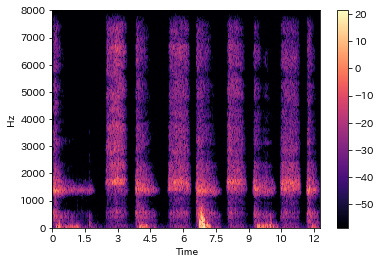

In [17]:
num_bins = 256 
frame_shift = int(0.01*sampling_rate) 
frame_size = int(0.02*sampling_rate) 
power_spectrum = np.abs(librosa.stft(pcm_data, n_fft=num_bins*2,win_length=frame_size, hop_length=frame_shift))**2 
log_spectrum = librosa.power_to_db(power_spectrum) 
#plt.figure(figsize=(12, 8)) 
librosa.display.specshow(log_spectrum, sr=sampling_rate, hop_length=frame_shift, x_axis='time', y_axis='hz') 
plt.colorbar() 
plt.show(block=False)

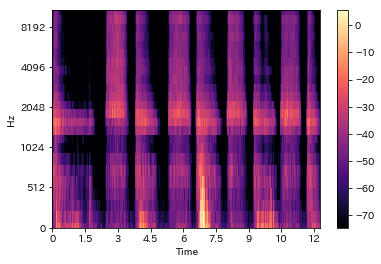

In [18]:
mel_filter_bank = librosa.filters.mel(sampling_rate, num_bins*2, n_mels=24, htk=True) 
mel_spectrum = np.dot(mel_filter_bank, power_spectrum) 
log_mel_spectrum = librosa.power_to_db(mel_spectrum) 
#plt.figure(figsize=(12, 8)) 
librosa.display.specshow(log_mel_spectrum, sr=sampling_rate,hop_length=frame_shift, x_axis='time', y_axis='mel') 
plt.colorbar() 
plt.show(block=False)

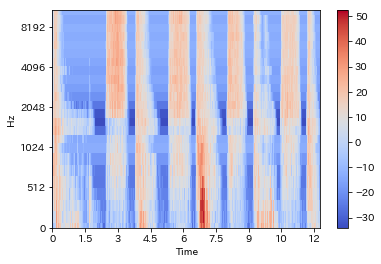

In [19]:
#Mean Norm 
log_mel_spectrum_mean = np.mean(log_mel_spectrum, axis = 1) 
num_dims, num_frames = log_mel_spectrum.shape 
log_mel_spectrum_norm= log_mel_spectrum 
for j in range(0,num_dims): 
    for t in range(0,num_frames): 
        log_mel_spectrum_norm[j,t] = log_mel_spectrum[j,t] - log_mel_spectrum_mean[j] 
    librosa.display.specshow(log_mel_spectrum_norm, sr=sampling_rate,hop_length=frame_shift, x_axis='time', y_axis='mel') 
plt.colorbar() 
plt.show(block=False)

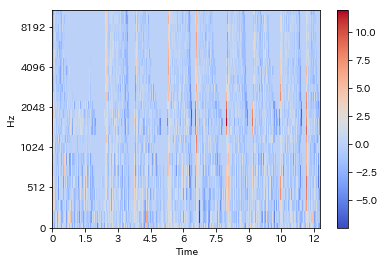

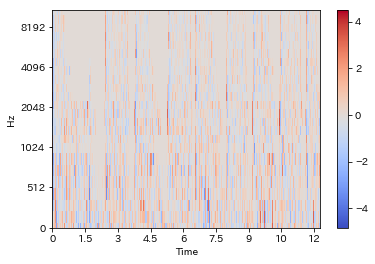

In [20]:
#Delta 
D_log_mel_spectrum=librosa.feature.delta(log_mel_spectrum, width=5, order=1) 
#plt.figure(figsize=(12, 8)) 
librosa.display.specshow(D_log_mel_spectrum, sr=sampling_rate,hop_length=frame_shift, x_axis='time', y_axis='mel')
plt.colorbar() 
plt.show(block=False)

##delta delta 
DD_log_mel_spectrum=librosa.feature.delta(log_mel_spectrum, width=7, order=2) 
#plt.figure(figsize=(12, 8)) 
librosa.display.specshow(DD_log_mel_spectrum, sr=sampling_rate,hop_length=frame_shift, x_axis='time', y_axis='mel') 
plt.colorbar() 
plt.show(block=False)

In [22]:
#generate feature 
stack_mel_spectrum =  np.vstack((log_mel_spectrum, D_log_mel_spectrum, DD_log_mel_spectrum)) 
feature = stack_mel_spectrum.T 
#バイナリ形式で保存しておく 
np.save('breath_my.npy', feature)